In [1]:
from utils import *
import numpy as np 
import matplotlib.pyplot as plt
train_labels_aug, train_data_aug = data_aug(sample_per_class= 10000, mode = 'reduced')
test_labels_aug, test_data_aug = data_aug(sample_per_class= 1000, mode = 'reduced')



0  Train error: 8.60%  Test error: 8.13% 
1  Train error: 14.33%  Test error: 14.87% 
2  Train error: 0.88%  Test error: 0.60% 
3  Train error: 0.32%  Test error: 0.30% 
4  Train error: 0.13%  Test error: 0.23% 
5  Train error: 0.07%  Test error: 0.07% 
6  Train error: 0.02%  Test error: 0.07% 
7  Train error: 0.01%  Test error: 0.00% 
8  Train error: 0.01%  Test error: 0.00% 
9  Train error: 0.00%  Test error: 0.00% 
Final Train error: 0.00%  Test error: 0.00% 


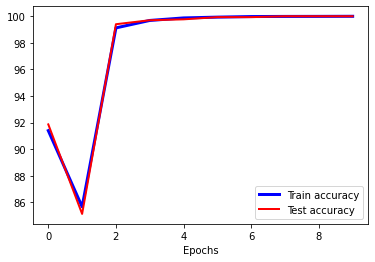

In [3]:
# Building and training the Model 
from mlp import MLP
from train import train_model
import matplotlib.pyplot as plt

train_images= torch.tensor(train_data_aug).view(-1,1,28,28).float()
train_labels=convert_to_one_hot_labels(train_images, torch.tensor(train_labels_aug))

test_images=torch.tensor(test_data_aug).view(-1,1,28,28).float()
test_labels=convert_to_one_hot_labels(test_images, torch.tensor(test_labels_aug))

# Normalization of the data 
mu, std = train_images.mean(), train_images.std()
train_images.sub_(mu).div_(std)

# Normalization of the data 
mu, std = test_images.mean(), test_images.std()
test_images.sub_(mu).div_(std)

perm=torch.randperm(train_labels.shape[0])
train_labels=train_labels[perm]
train_images=train_images[perm, : , :, :]

model = MLP()

train_error,test_error=train_model(model, train_images, train_labels,
                                   test_images, test_labels, 
                                    mini_batch_size = 1000 , nb_epochs =10, verbose=1)


# Plotting the accuracy 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,train_error.shape[0]), 100-train_error, color='blue', linewidth=3,label='Train accuracy')
ax.plot(range(0,test_error.shape[0]), 100-test_error, color='red', linewidth=2,label='Test accuracy')
ax.set_xlabel('Epochs')
ax.legend()
plt.show()

In [19]:
plot=0
if plot==1:
    for i in range(10):
        plt.imshow(train_images[i,0,:,:], cmap= 'gray')
        _,labels=train_labels[i,:].max(dim=0)
        plt.title(labels.item())
        plt.show()

In [1]:
from utils import *
import numpy as np 
import matplotlib.pyplot as plt

train_labels_aug, train_data_aug = data_aug(sample_per_class= 2000)
test_labels_aug, test_data_aug = data_aug(sample_per_class= 2000)

image_shape = (28, 28)
train_set_size = 6000
test_set_size = 6000


train_images_path = 'train/train-images-idx3-ubyte.gz'
train_labels_path = 'train/train-labels-idx1-ubyte.gz'
test_images_path ='train/t10k-images-idx3-ubyte.gz'
test_labels_path = 'train/t10k-labels-idx1-ubyte.gz'

train_images_mnist = extract_data(train_images_path, image_shape, train_set_size)
test_images_mnist = extract_data(test_images_path, image_shape, test_set_size)
train_labels_mnist = extract_labels(train_labels_path, train_set_size)
test_labels_mnist = extract_labels(test_labels_path, test_set_size)

train_images_full=torch.tensor(np.concatenate((train_images_mnist,train_data_aug))).view(-1,1,28,28)
test_images_full=torch.tensor(np.concatenate((test_images_mnist,test_data_aug))).view(-1,1,28,28)
train_labels_full=torch.tensor(np.concatenate((train_labels_mnist,train_labels_aug)))
test_labels_full=torch.tensor(np.concatenate((test_labels_mnist, test_labels_aug)))

# One hot encoding of the labels
train_labels_full_hot=convert_to_one_hot_labels(train_images_full, train_labels_full)
test_labels_full_hot=convert_to_one_hot_labels(test_images_full, test_labels_full)

perm=torch.randperm(train_labels_full_hot.shape[0])
train_labels_full_hot=train_labels_full_hot[perm,:]
train_images_full=train_images_full[perm, : , :, :]

perm2=torch.randperm(test_labels_full_hot.shape[0])
test_labels_full_hot=test_labels_full_hot[perm2]
test_images_full=test_images_full[perm2, : , :, :]

# Normalization of the data 
mu, std = train_images_full.mean(), train_images_full.std()
train_images_full.sub_(mu).div_(std);

# Normalization of the data 
mu, std = test_images_full.mean(), test_images_full.std()
test_images_full.sub_(mu).div_(std);

In [84]:
plot=0
if plot==1:
    for i in range(50): #test_images.size(0)):
        plt.imshow(test_images_full[i,0,:,:], cmap= 'gray')
        _,labels=test_labels_full_hot[i,:].max(dim=0)
        plt.title(labels.item())
        plt.show()
test_images_mnist.shape

(6000, 28, 28)

0  Train error: 35.70%  Test error: 38.68% 
0  Train error: 35.70%  Test error: 38.68% 
1  Train error: 16.78%  Test error: 19.04% 
2  Train error: 9.68%  Test error: 12.29% 
3  Train error: 7.17%  Test error: 9.90% 
4  Train error: 5.99%  Test error: 8.95% 
5  Train error: 4.89%  Test error: 7.83% 
6  Train error: 4.13%  Test error: 7.18% 
7  Train error: 3.53%  Test error: 6.65% 
8  Train error: 3.06%  Test error: 6.37% 
9  Train error: 2.75%  Test error: 6.08% 
10  Train error: 2.32%  Test error: 5.78% 
10  Train error: 2.32%  Test error: 5.78% 
11  Train error: 1.96%  Test error: 5.42% 
12  Train error: 1.77%  Test error: 5.18% 
13  Train error: 1.57%  Test error: 5.13% 
14  Train error: 1.44%  Test error: 5.03% 
15  Train error: 1.31%  Test error: 4.90% 
16  Train error: 1.23%  Test error: 4.89% 
17  Train error: 1.17%  Test error: 4.77% 
18  Train error: 1.04%  Test error: 4.67% 
19  Train error: 1.02%  Test error: 4.63% 
20  Train error: 0.93%  Test error: 4.65% 
20  Train error

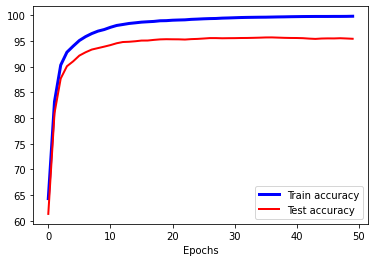

In [39]:
# Building and training the Model 
from mlp2 import MLP
from convnet import ConvNet
from train import train_model
import matplotlib.pyplot as plt



model = MLP()
#model.load_state_dict(torch.load('ConvNetState1'))


train_error,test_error=train_model(model, train_images_full, train_labels_full_hot,
                                   test_images_full,  test_labels_full_hot, 
                                    mini_batch_size = 100, nb_epochs = 50, verbose=2)

# Plotting the accuracy 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,train_error.shape[0]), 100-train_error, color='blue', linewidth=3,label='Train accuracy')
ax.plot(range(0,test_error.shape[0]), 100-test_error, color='red', linewidth=2,label='Test accuracy')
ax.set_xlabel('Epochs')
ax.legend()
plt.show()

In [6]:
torch.save(model.state_dict(), 'ConvNetState1')

In [3]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

339613


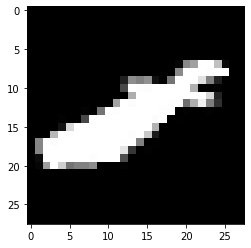

tensor([12])


In [56]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

path = 'test/sword.jpg'


# read image
img = cv.imread(path)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, img_gray_bin = cv.threshold(img_gray,123,255,cv.THRESH_BINARY_INV)

res = cv.resize(img_gray_bin,None,fx=0.9, fy=0.5, interpolation = cv.INTER_CUBIC)

ht, wd= res.shape
# create new image of desired size and color (blue) for padding
ww = 28
hh = 28
result = np.full((hh,ww), 0, dtype=np.uint8)

# compute center offset
xx = (ww - wd) // 2
yy = (hh - ht) // 2

# copy img image into center of result image
result[yy:yy+ht, xx:xx+wd] = res


# view result

n=3

#plt.imshow(test_images_full[n,0,:,:], cmap='gray')
#plt.show()
plt.imshow(result, cmap='gray')
plt.show()

result=torch.tensor(result).view(-1,1,28,28).float()
mu, std = result.mean(), result.std()
result.sub_(mu).div_(std)


output=model(result) 
_, predicted_classes = output.max(1)
print(predicted_classes)

In [15]:
test_images.shape

torch.Size([360, 1, 28, 28])